**Make sure your compute resource is set to GPU else you'll need to reset your session from scratch**

---
Group yourself to 4 max, and fill in below details
Group member detail(s): \
1. Abdul Qaiyum bin Haji Muhammad - 21b6018
2. Mohamad Qamarudeen bin Haji Halias - 21b6012
3. Muhammad Khairul Hakeem bin Haji Khairulnijam - 21b6006
4. Ahmad Abdul Hadi bin Haji Zulkiflee - 21b6002

Some of the concepts may be technically advanced, instead, it is to focus on learning how to effectively use Google Colab for scientific research. Don't fret if you dont understand any of codes written for you.

# Setting up Environment

Task 1: Set Up the Environment \
Import the necessary libraries for the exercise, PyTorch for neural network training.\
Load the CIFAR10 dataset.


In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from google.colab import files
from PIL import Image

In [2]:
#Code to use GPU:
#device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

#Code to use CPU:
#device = torch.device('cpu')

# Set the device to GPU if available, otherwise, use CPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [3]:
# Define the modified neural network architecture for CIFAR-10
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(8 * 8 * 32, 128)  # Adjusted for CIFAR-10 image size
        self.relu3 = nn.ReLU()
        self.fc2 = nn.Linear(128, 10)  # Output size matches the number of CIFAR-10 classes (10)

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu1(x)
        x = self.pool1(x)
        x = self.conv2(x)
        x = self.relu2(x)
        x = self.pool2(x)
        x = x.view(-1, 8 * 8 * 32)  # Adjusted for CIFAR-10 image size
        x = self.fc1(x)
        x = self.relu3(x)
        x = self.fc2(x)
        return x


Below are the Hyperparameters for the neural network (think of it as knobs that you can tune to enhance performance)


Task 4: Model debugging (Mess around with these 3 hyperparameters) \
hint: \
LEARNING_RATE: The current value is set to 1e10 (10000000000.0). Try adjusting it to find an optimal learning rate.\
BATCH_SIZE: Set it to a power of 2, such as 16, 32, or 64, to potentially improve training efficiency. \
EPOCH: Consider letting the model train for more epochs. The default value is set to 1; experiment with longer training durations for better convergence and performance evaluation.

In [4]:
#Initial values used:
#BATCH_SIZE = 1
#LEARNING_RATE = 1e10
#EPOCH = 1

#Final values used:
BATCH_SIZE = 64
LEARNING_RATE = 0.001
EPOCH = 15

In [5]:
# Function to train the model
def train_model(model, train_loader, criterion, optimizer, num_epochs=5):
    model.to(device)
    model.train()
    for epoch in range(num_epochs):
        running_loss = 0.0
        correct_predictions = 0  # Initialize a counter for correct predictions
        total_samples = 0  # Initialize a counter for total samples

        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

             # Measure accuracy
            _, predicted = torch.max(outputs, 1)
            correct_predictions += (predicted == labels).sum().item()
            total_samples += labels.size(0)

        # Calculate accuracy for the current epoch
        accuracy = 100.0 * correct_predictions / total_samples
        print(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss/len(train_loader):.4f}, Accuracy: {accuracy}")
    print("Training complete!")


In [6]:
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transforms)

100%|██████████| 170498071/170498071 [00:03<00:00, 49306719.18it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data


In [7]:
#Uncommented 1 line of code to resolve the error.
#Added "CIFAR10" to the following code line torch.dataset.CIFAR10.
#Code ran successfully.

# Load and preprocess the CFAR10 dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
#TODO: Complete below line to import CIFAR10 dataset
train_set = torchvision.datasets.CIFAR10(root='./data', train=True,download=True, transform=transform)
train_loader = DataLoader(train_set, batch_size=BATCH_SIZE, shuffle=True)

Files already downloaded and verified


In [8]:
train_set.classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [9]:
# Create the model, loss function, and optimizer
model = SimpleCNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=LEARNING_RATE, momentum=0.9)

Task 2: Measure performance difference training between GPU and CPU


In [10]:
#training speed using GPU = 3m 26s
#Epoch 1/15, Loss: 2.1305, Accuracy: 22.28
#Epoch 2/15, Loss: 1.7115, Accuracy: 39.546
#Epoch 3/15, Loss: 1.4983, Accuracy: 46.604
#Epoch 4/15, Loss: 1.3767, Accuracy: 51.074
#Epoch 5/15, Loss: 1.2972, Accuracy: 54.008
#Epoch 6/15, Loss: 1.2295, Accuracy: 56.514
#Epoch 7/15, Loss: 1.1748, Accuracy: 58.626
#Epoch 8/15, Loss: 1.1234, Accuracy: 60.424
#Epoch 9/15, Loss: 1.0762, Accuracy: 62.076
#Epoch 10/15, Loss: 1.0333, Accuracy: 63.77
#Epoch 11/15, Loss: 0.9929, Accuracy: 65.148
#Epoch 12/15, Loss: 0.9569, Accuracy: 66.386
#Epoch 13/15, Loss: 0.9192, Accuracy: 67.928
#Epoch 14/15, Loss: 0.8877, Accuracy: 68.96
#Epoch 15/15, Loss: 0.8533, Accuracy: 70.254
#Training complete!

#training speed using CPU = 8m 26s
#Epoch 1/15, Loss: 2.1822, Accuracy: 21.384
#Epoch 2/15, Loss: 1.7973, Accuracy: 36.296
#Epoch 3/15, Loss: 1.5872, Accuracy: 43.756
#Epoch 4/15, Loss: 1.4489, Accuracy: 48.418
#Epoch 5/15, Loss: 1.3519, Accuracy: 51.662
#Epoch 6/15, Loss: 1.2769, Accuracy: 54.476
#Epoch 7/15, Loss: 1.2214, Accuracy: 56.7
#Epoch 8/15, Loss: 1.1668, Accuracy: 58.628
#Epoch 9/15, Loss: 1.1157, Accuracy: 60.638
#Epoch 10/15, Loss: 1.0714, Accuracy: 62.292
#Epoch 11/15, Loss: 1.0282, Accuracy: 63.88
#Epoch 12/15, Loss: 0.9881, Accuracy: 65.226
#Epoch 13/15, Loss: 0.9499, Accuracy: 66.64
#Epoch 14/15, Loss: 0.9165, Accuracy: 67.876
#Epoch 15/15, Loss: 0.8856, Accuracy: 68.844

# Train the model
train_model(model, train_loader, criterion, optimizer, num_epochs=EPOCH)

Epoch 1/15, Loss: 2.1305, Accuracy: 22.28
Epoch 2/15, Loss: 1.7115, Accuracy: 39.546
Epoch 3/15, Loss: 1.4983, Accuracy: 46.604
Epoch 4/15, Loss: 1.3767, Accuracy: 51.074
Epoch 5/15, Loss: 1.2972, Accuracy: 54.008
Epoch 6/15, Loss: 1.2295, Accuracy: 56.514
Epoch 7/15, Loss: 1.1748, Accuracy: 58.626
Epoch 8/15, Loss: 1.1234, Accuracy: 60.424
Epoch 9/15, Loss: 1.0762, Accuracy: 62.076
Epoch 10/15, Loss: 1.0333, Accuracy: 63.77
Epoch 11/15, Loss: 0.9929, Accuracy: 65.148
Epoch 12/15, Loss: 0.9569, Accuracy: 66.386
Epoch 13/15, Loss: 0.9192, Accuracy: 67.928
Epoch 14/15, Loss: 0.8877, Accuracy: 68.96
Epoch 15/15, Loss: 0.8533, Accuracy: 70.254
Training complete!


Report your findings on:
*   What were the key differences you observed in the training speed between the GPU and CPU?

 The key differences observed in the training speed between GPU and CPU:
 1. Training Time - GPU has the fastest training speed when compared with CPU. GPU training completed in 3 minutes and 26 seconds while CPU training completed in 8 minutes and 26 seconds.
 2. Epoch Completion Rate - As GPU has the faster training speed, GPU is able to complete more epochs within the same time frame when compared to CPU.
 3. Resource Utilization - GPU's parallel processing capabilities is significantly better than CPU.

*   Were there any challenges or limitations you encountered while using the GPU for training?

 There were no challenges and limitations encountered however there are issues to be wary about when using GPU to train a model:
 1. Memory limitation - GPU's have limited memory compared to CPUs thus it can lead to out-of-memory errors. Maybe the author to the Assignment 2 code has expectional coding capabilities to overcome this issue xD

*   Did you notice any impact on the final model's performance (accuracy, loss) when trained on the GPU versus the CPU?

 Yes, these are the final model's performance accuracy and loss for both GPU and CPU:

 GPU training:
 * Final Accuracy: 70.254%
 * Final Loss: 0.8533

 CPU training:
 * Final Accuracy: 68.844%
 * Final Loss: 0.8856

 Based on these results, we can conclude, GPU achieve a slightly higher accuracy and lower loss value than CPU. This suggests that using GPU to train the model is able to make better progress than using a CPU.

Task 3: Visualize Loss and Accuracy


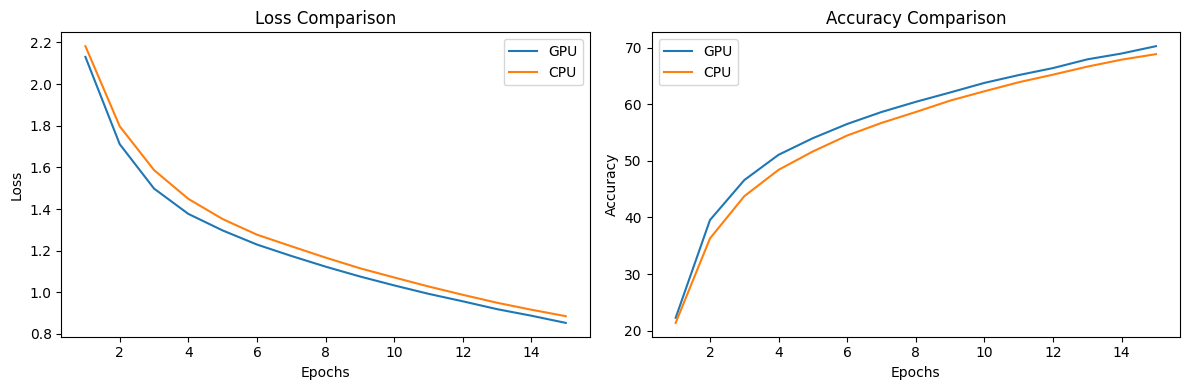

In [14]:
#TODO:
import matplotlib.pyplot as plt

# Initializing Loss and accuracy values for GPU and CPU
gpu_epochs = list(range(1, 16))
gpu_loss = [2.1305, 1.7115, 1.4983, 1.3767, 1.2972, 1.2295, 1.1748, 1.1234, 1.0762, 1.0333, 0.9929, 0.9569, 0.9192, 0.8877, 0.8533]
gpu_accuracy = [22.28, 39.546, 46.604, 51.074, 54.008, 56.514, 58.626, 60.424, 62.076, 63.77, 65.148, 66.386, 67.928, 68.96, 70.254]

cpu_epochs = list(range(1, 16))
cpu_loss = [2.1822, 1.7973, 1.5872, 1.4489, 1.3519, 1.2769, 1.2214, 1.1668, 1.1157, 1.0714, 1.0282, 0.9881, 0.9499, 0.9165, 0.8856]
cpu_accuracy = [21.384, 36.296, 43.756, 48.418, 51.662, 54.476, 56.7, 58.628, 60.638, 62.292, 63.88, 65.226, 66.64, 67.876, 68.844]

# Initializing subplots for loss and accuracy
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Plotting Loss
ax1.plot(gpu_epochs, gpu_loss, label='GPU')
ax1.plot(cpu_epochs, cpu_loss, label='CPU')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.set_title('Loss Comparison')
ax1.legend()

# Plotting Accuracy
ax2.plot(gpu_epochs, gpu_accuracy, label='GPU')
ax2.plot(cpu_epochs, cpu_accuracy, label='CPU')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.set_title('Accuracy Comparison')
ax2.legend()

# Adjusting layout and display plots
plt.tight_layout()
plt.show()

Task 4: Test your own Image \
You can use the same code from the tutorial and ensure your model is properly trained!



In [12]:
#Changed transforms.Resize((28, 28)), to
#        transforms.Resize((32, 32)),

#Changed image = Image.open(upload).convert('L') to
#        image = Image.open(upload).convert('RGB')

transform = transforms.Compose([
    transforms.Resize((32, 32)),  # Resize the image to match the model input size
    transforms.ToTensor(),  # Convert the image to a tensor
   transforms.Normalize((0.5,), (0.5,)),  # Normalize the image
])

# Function to preprocess and make predictions on the uploaded image
def predict_uploaded_image(upload):
    # Open the uploaded image
    image = Image.open(upload).convert('RGB')
    model.to("cpu")  # Set the model to evaluation mode

    # Preprocess the image
    input_tensor = transform(image)
    input_batch = input_tensor.unsqueeze(0)  # Add a batch dimension

    # Make predictions using the model
    with torch.no_grad():
        output = model(input_batch)
    _, predicted_idx = torch.max(output, 1)

    print(f"Predicted labels: {train_set.classes[predicted_idx]}")

In [13]:
#Uploaded a picture of a cat, successfully predicted it was indeed a cat

# Upload an image for prediction
uploaded = files.upload()

# If an image is uploaded, call the prediction function
if len(uploaded) > 0:
    for file_name in uploaded.keys():
        predict_uploaded_image(file_name)
else:
    print("No image uploaded.")

Saving photo-1608848461950-0fe51dfc41cb.jpeg to photo-1608848461950-0fe51dfc41cb.jpeg
Predicted labels: cat
